# T3.2 Regresión logística

**Índice**

> 1 Introducción<br>
> 2 Regresión logística binaria<br>
>> 2.1 Modelo<br>
>> 2.2 Clasificadores lineales<br>
>> 2.3 Clasificadores no lineales<br>
>> 2.4 Estimación máximo-verosímil<br>
>> 2.5 Perceptrón<br>
>> 2.6 Estimación MAP<br>
>
> 3 Regresión logística multiclase<br>
>> 3.1 Modelo<br>
>> 3.2 Clasificadores lineales y no lineales<br>
>> 3.3 Estimación máximo-verosímil<br>

<p style="page-break-after:always;"></p>

# 1 Introducción

**Regresión logística:** $\;$ clasificador discriminativo para $C$ clases

**Regresión logística binaria:** $\;C=2$

**Regresión logística multinomial o multiclase:** $\;C>2$

<p style="page-break-after:always;"></p>

# 2 Regresión logística binaria

## 2.1 Modelo

**Regresión logística binaria:** $\;$ Bernoulli condicional para clasificación binaria, $y\in\{0,1\}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\operatorname{Ber}(y\mid\sigma(a))\quad\text{con log-odds}\quad
a=f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{x}+b$$
$$\begin{align*}
p(y=1\mid\boldsymbol{x};\boldsymbol{\theta})&=\sigma(a)=\frac{1}{1+e^{-a}}\\
p(y=0\mid\boldsymbol{x};\boldsymbol{\theta})&=1-\sigma(a)=\sigma(-a)=\frac{1}{1+e^a}%
\end{align*}$$

**Con etiquetas $\,\tilde{y}\in\{-1, 1\}$:** $\quad p(\tilde{y}\mid\boldsymbol{x};\boldsymbol{\theta})=\sigma(\tilde{y}a)$

**Ejemplo:** $\;p(y=1\mid x_1, x_2; \boldsymbol{w})=\sigma(w_1x_1+w_2x_2)\;$ para varios $\boldsymbol{w}$

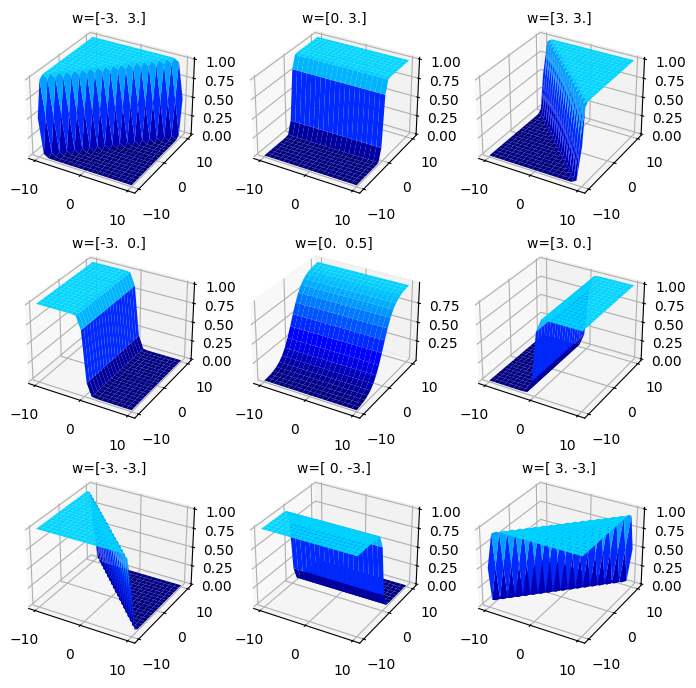

In [1]:
import numpy as np; import matplotlib.pyplot as plt
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
w = np.array([ [-3, 3], [0, 3], [3, 3], [-3, 0], [0, 0.5], [3, 0], [-3, -3], [0, -3], [3, -3] ])
nrows = ncols = int(np.ceil(np.sqrt(len(w))))
fig, axes = plt.subplots(nrows, ncols, figsize=(9/4*ncols, 9/4*nrows), constrained_layout=True)
for i in np.arange(len(w)):
    ax = axes.flat[i]; ax.axis('off')
    ax = fig.add_subplot(nrows, ncols, i + 1, projection='3d')
    z = 1.0 / (1.0 + np.exp(-(w[i, 0] * x + w[i, 1] * y)))
    ax.plot_surface(x, y, z, cmap='jet', vmin=0, vmax=3, rstride=1, cstride=1, linewidth=0)
    ax.set_title('w={0!s:.21s}'.format(w[i]), fontsize = 10, y=1)

<p style="page-break-after:always;"></p>

## 2.2 Clasificadores lineales

La regla de decisión MAP para regresión logística binaria puede expresarse en función de la logodds como sigue:
$$\begin{align*}
f(\boldsymbol{x})%
&=\mathbb{I}(p(y=1\mid\boldsymbol{x})>p(y=0\mid\boldsymbol{x}))\\%
&=\mathbb{I}\left(\log\frac{p(y=1\mid\boldsymbol{x})}{p(y=0\mid\boldsymbol{x})}>0\right)\\%
&=\mathbb{I}(a>0)\quad\text{con}\quad a=\boldsymbol{w}^t\boldsymbol{x}+b%
\end{align*}$$
Por tanto, esta regla viene a ser una función predictora lineal,
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+\boldsymbol{w}^t\boldsymbol{x}=b+\sum_{d=1}^D w_dx_d$$
que separa el espacio de entrada en dos partes mediante una frontera hiperplanar,
$$\boldsymbol{w}^t\boldsymbol{x}+b=0$$

<p style="page-break-after:always;"></p>

**Ejemplo:** $\;\boldsymbol{w}=(2, 1, 2)^t\;$ y $\;b=0$; $\;$ frontera $\;2x_1+x_2+2x_3+0=0$

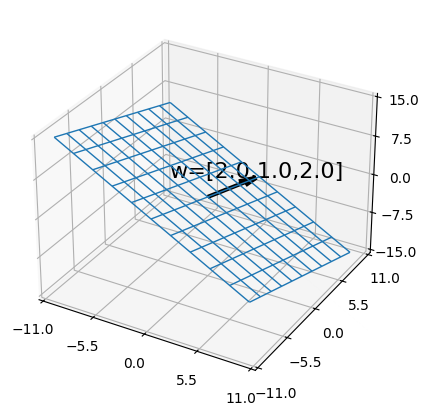

In [2]:
import numpy as np; import matplotlib.pyplot as plt
w1, w2, w3, b = 2.0, 1.0, 2.0, 0.0
x1, x2 = np.meshgrid(np.linspace(-10, 10, 11), np.linspace(-10, 10, 11))
x3 = lambda x1, x2: (-w1 * x1  - w2 * x2 - b) / w3
fig = plt.figure(figsize=(5, 5)); ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x1, x2, x3(x1, x2), rstride=1, cstride=1, linewidth=1)
scaw = 2.0; ax.quiver(0, 0, x3(0, 0), scaw * w1, scaw * w2, scaw * w3, linewidth=3, colors='black')
ax.text(scaw * w1, scaw * w2, scaw * w3, f"w=[{w1},{w2},{w3}]", fontsize=16, ha='center')
x_min, x_max = ax.get_xlim(); ax.set_xticks(np.linspace(x_min, x_max, 5))
y_min, y_max = ax.get_ylim(); ax.set_yticks(np.linspace(y_min, y_max, 5))
z_min, z_max = ax.get_zlim(); ax.set_zticks(np.linspace(z_min, z_max, 5));

<p style="page-break-after:always;"></p>

**Separabilidad lineal:** $\;$ decimos que las muestras (de entrenamiento) son **linealmente separables** si pueden separarse mediante un hiperplano

**Ejemplo:** virgínica y no-virgínica no son separables con longitud y amplitud de pétalos

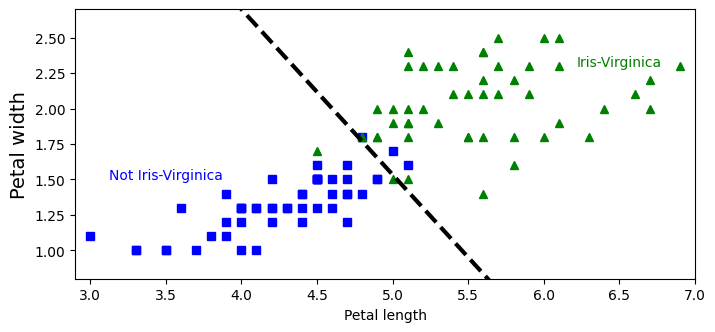

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris(); X = iris["data"][:, (2, 3)]  # petal length, petal width
y = np.array(iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
log_reg = LogisticRegression(solver="lbfgs").fit(X, y)
plt.figure(figsize=(8, 3.5)); plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^"); left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=10, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=10, color="g", ha="center")
plt.xlabel("Petal length", fontsize=10); plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]);

<p style="page-break-after:always;"></p>

## 2.3 Clasificadores no lineales

**No-linealidad usual:** $\;$ de los problemas de clasificación; esto es, con datos de entrenamiento no linealmente separables

**Linearización:** $\;$ estrategia usual para atacar un problema no lineal: $\;$ **linearizar** los datos en preproceso

**Ejemplo:** $\;f(\boldsymbol{x})=x_1^2+x_2^2-R^2=\boldsymbol{w}^t\phi(\boldsymbol{x})+b\;$ con preproceso $\;\phi(x_1,x_2)=(x_1^2, x_2^2),\;\boldsymbol{w}=(1, 1)\;$ y $\;b=-R^2$

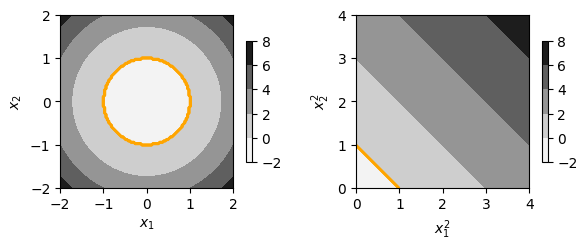

In [4]:
import numpy as np; import matplotlib.pyplot as plt; R = 1
xr = np.linspace(-2, 2, 128); x1, x2 = np.meshgrid(xr, xr); X = np.c_[np.ravel(x1), np.ravel(x2)]
z = lambda x: x[0]**2 + x[1]**2 - R**2; Z = np.apply_along_axis(z, 1, X)
fig, axes = plt.subplots(1, 2, figsize=(7, 2.25)); axes[0].set(aspect='equal')
axes[0].set_xlabel('$x_1$', fontsize=10); axes[0].set_ylabel('$x_2$', fontsize=10)
axes[0].contour(x1, x2, (Z > 0).reshape(x1.shape), 4, colors='orange', linestyles='solid')
cp = axes[0].contourf(x1, x2, Z.reshape(x1.shape), 4, cmap='Greys')
plt.colorbar(cp, ax=axes[0], shrink=0.7); xxr = np.linspace(0, 4, 128)
xx1, xx2 = np.meshgrid(xxr, xxr); XX = np.c_[np.ravel(xx1), np.ravel(xx2)]
zz = lambda xx: xx[0] + xx[1] - R**2; ZZ = np.apply_along_axis(zz, 1, XX); axes[1].set(aspect='equal')
axes[1].set_xlabel('$x_1^2$', fontsize=10); axes[1].set_ylabel('$x_2^2$', fontsize=10)
axes[1].contour(xx1, xx2, (ZZ > 0).reshape(xx1.shape), 4, colors='orange', linestyles='solid')
cp = axes[1].contourf(xx1, xx2, ZZ.reshape(xx1.shape), 4, cmap='Greys')
plt.colorbar(cp, ax=axes[1], shrink=0.7);

<p style="page-break-after:always;"></p>

## 2.4 Estimación máximo-verosímil

Sea un modelo de regresión logística binaria $p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)\;$, $y\in\{0,1\}$, con $\;\mu=\sigma(a)\;$ y $\;a=\boldsymbol{w}^t\boldsymbol{x},\;$ en el que asumimos que $\boldsymbol{w}$ absorbe el sesgo $b$. La neg-log-verosimilitud de $\boldsymbol{w}$ respecto a $N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\;$ (normalizada por $N$) es:
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{w})%
&=-\frac{1}{N}\log p(\mathcal{D}\mid\boldsymbol{w})\\%
&=-\frac{1}{N}\log \prod_{n=1}^N \operatorname{Ber}(y_n\mid \mu_n)%
&&\text{($\mu_n=\sigma(a_n)$ con log-odds $a_n=\boldsymbol{w}^t\boldsymbol{x}_n$)}\\%
&=-\frac{1}{N}\sum_{n=1}^N \log(\mu_n^{y_n}\,(1-\mu_n)^{(1-y_n)})\\%
&=-\frac{1}{N}\sum_{n=1}^N y_n\log\mu_n + (1-y_n)\log(1-\mu_n)\\%
&=\frac{1}{N}\sum_{n=1}^N \mathbb{H}(y_n,\mu_n)%
&&\text{($\mathbb{H}$ entropía cruzada)}%
\end{align*}$$

Es fácil comprobar que el gradiente del objetivo es:
$$\mathbf{\nabla}_{\boldsymbol{w}}\operatorname{NLL}(\boldsymbol{w})=\frac{1}{N}\sum_{n=1}^N(\mu_n-y_n)\boldsymbol{x}_n$$

Una manera sencilla de minimizar el objetivo consiste en aplicar SGD con minibatch de talla uno:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$

<p style="page-break-after:always;"></p>

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
N, n_clusters_per_class, class_sep = 20, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[ 1.25996917  1.64179551  1.        ]
 [-0.83838799  0.62402009  0.        ]
 [-0.1537659   0.23552571  1.        ]
 [ 0.80320757  0.98988481  1.        ]
 [-0.43922298 -0.60061553  1.        ]
 [ 3.1838123   2.10053075  1.        ]
 [-1.60715171  1.07697121  0.        ]
 [-0.95880356 -1.12480751  0.        ]
 [ 1.50342747 -1.27202556  1.        ]
 [-1.53869364 -1.45786074  0.        ]
 [-1.81462687 -1.05768796  0.        ]
 [-0.5803313   0.81998998  0.        ]
 [ 0.12478063 -0.66432393  1.        ]
 [ 1.80316046  1.59268424  1.        ]
 [-2.43390484 -1.94583259  0.        ]
 [-0.3332225  -0.78860734  0.        ]
 [-0.21004913 -0.40644192  1.        ]
 [ 2.46451481 -1.49559033  1.        ]
 [-0.36718216  0.11445494  0.        ]
 [-0.80066714  1.21772275  0.        ]]



<p style="page-break-after:always;"></p>


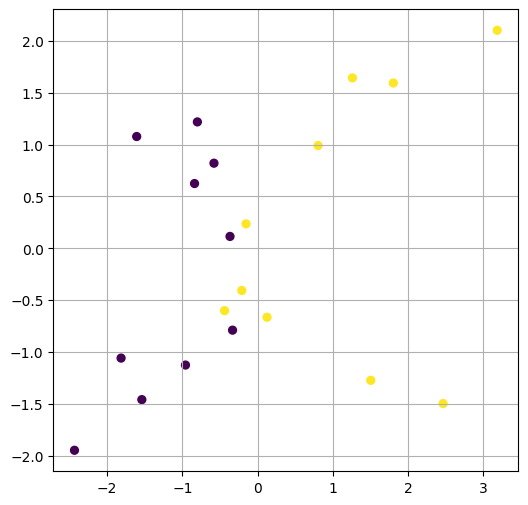

In [6]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]


<p style="page-break-after:always;"></p>


In [7]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, w[n+1])

1 [0.18899538 0.24626933]
2 [0.31445336 0.15288976]
3 [0.29124614 0.18843664]
4 [0.38676509 0.30615561]
5 [0.30934828 0.20029198]
6 [0.49743978 0.32438597]
7 [0.68515608 0.19859507]
8 [0.76946749 0.29750388]
9 [0.91138963 0.17742586]
10 [0.98507439 0.24723971]
11 [1.0472157 0.2834599]
12 [1.11811968 0.18327479]
13 [1.13667052 0.08451135]
14 [1.19140279 0.13285492]
15 [1.22116931 0.15665234]
16 [1.25819799 0.24428476]
17 [1.22102531 0.17235617]
18 [1.26538969 0.14543366]
19 [1.30833242 0.13204791]
20 [1.3784187  0.02545474]



<p style="page-break-after:always;"></p>


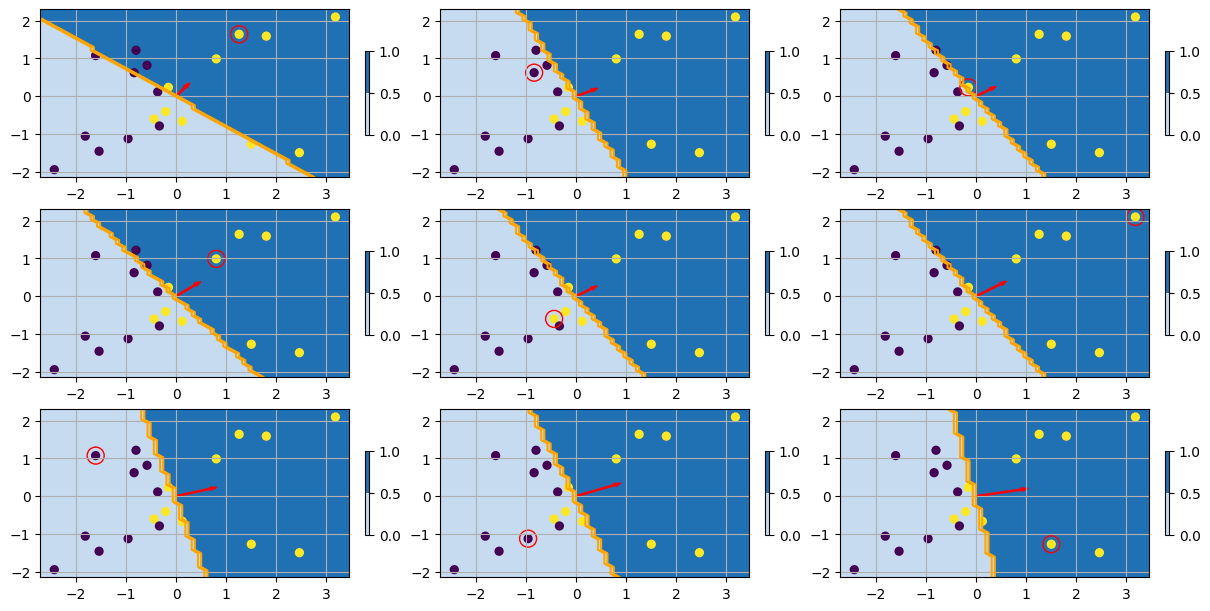

In [8]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, w[n+1, 0], w[n+1, 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)

<p style="page-break-after:always;"></p>

## 2.5 Perceptrón

Regresión logística binaria es un modelo probabilístico para clasificación en dos clases, $y\in\{0,1\}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=\sigma(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$
**Perceptrón** puede verse como una variante con escalón Heaviside, $H(a)=\mathbb{I}(a>0)$, en lugar de sigmoide:
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Ber}(y\mid\mu)%
\quad\text{con}\quad%
\mu=H(a)%
\quad\text{y}\quad%
a=\boldsymbol{w}^t\boldsymbol{x}%
\quad\text{($b$ absorbido en $\boldsymbol{w}$)}$$

En el caso de regresión logística, el MLE de $\boldsymbol{w}$ puede obtenerse mediante descenso por gradiente estocástico (con minibatch de talla uno):
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\mu_n-y_n)\boldsymbol{x}_n$$
En el caso de Perceptrón, el MLE de $\boldsymbol{w}$ no puede obtenerse del mismo modo ya que la log-verosimilitud no es diferenciable. No obstante, $\boldsymbol{w}$ puede aprenderse mediante el **algoritmo Perceptrón**, iterando sobre los datos con:
$$\boldsymbol{w}_{t+1}=\boldsymbol{w}_t-\eta_t(\hat{y}_n-y_n)\boldsymbol{x}_n$$
Nótese que el algoritmo Perceptrón es prácticamente idéntico a SGD aplicado a regresión logística binaria.

<p style="page-break-after:always;"></p>

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [9]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.datasets import make_classification
N, n_clusters_per_class, class_sep = 20, 2, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep) #, random_state=1)
print(np.c_[X, y])

[[ 2.03753093 -1.34596196  1.        ]
 [ 1.58197704  0.87505119  1.        ]
 [-0.03727242  0.43532502  1.        ]
 [-1.27866998  1.03330264  0.        ]
 [-0.5971539   1.83585613  0.        ]
 [ 0.40146196 -0.73240445  1.        ]
 [ 0.60218977  1.00951257  1.        ]
 [-0.88983743  1.41306433  0.        ]
 [-1.87755924 -1.88945478  0.        ]
 [-1.16148658  0.7354587   0.        ]
 [-1.04072158 -1.4776434   0.        ]
 [-1.39432451  1.42524642  0.        ]
 [ 0.94312786  1.17343372  1.        ]
 [-0.46322372 -0.77160862  1.        ]
 [ 0.76552708 -1.1045721   1.        ]
 [-1.67305238 -2.3764515   0.        ]
 [-1.0028894  -1.16566924  0.        ]
 [-2.79010644 -2.80527112  0.        ]
 [ 1.05146179 -1.54146457  1.        ]
 [ 0.6874102   1.16637857  1.        ]]



<p style="page-break-after:always;"></p>


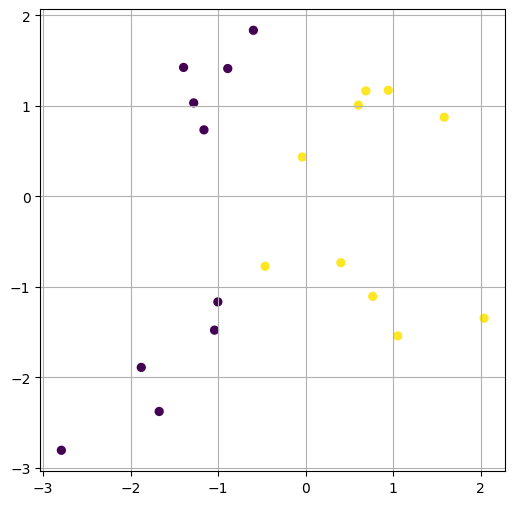

In [10]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
XX = np.c_[np.ravel(xx), np.ravel(yy)]


<p style="page-break-after:always;"></p>


In [11]:
w, eta = np.zeros((N + 1, 2)), 0.3
for n in np.arange(N):
    # mun = 1.0 / (1.0 + np.exp(- w[n, :] @ X[n, :]))
    mun = np.heaviside(w[n, :] @ X[n, :], 0.0)
    grad = mun - y[n]
    w[n+1, :] = w[n, :] - eta * (mun - y[n]) * X[n, :]
    print(n+1, mun, w[n+1])

1 0.0 [ 0.61125928 -0.40378859]
2 1.0 [ 0.61125928 -0.40378859]
3 0.0 [ 0.60007755 -0.27319108]
4 0.0 [ 0.60007755 -0.27319108]
5 0.0 [ 0.60007755 -0.27319108]
6 1.0 [ 0.60007755 -0.27319108]
7 1.0 [ 0.60007755 -0.27319108]
8 0.0 [ 0.60007755 -0.27319108]
9 0.0 [ 0.60007755 -0.27319108]
10 0.0 [ 0.60007755 -0.27319108]
11 0.0 [ 0.60007755 -0.27319108]
12 0.0 [ 0.60007755 -0.27319108]
13 1.0 [ 0.60007755 -0.27319108]
14 0.0 [ 0.46111044 -0.50467367]
15 1.0 [ 0.46111044 -0.50467367]
16 1.0 [0.96302615 0.20826178]
17 0.0 [0.96302615 0.20826178]
18 0.0 [0.96302615 0.20826178]
19 1.0 [0.96302615 0.20826178]
20 1.0 [0.96302615 0.20826178]



<p style="page-break-after:always;"></p>


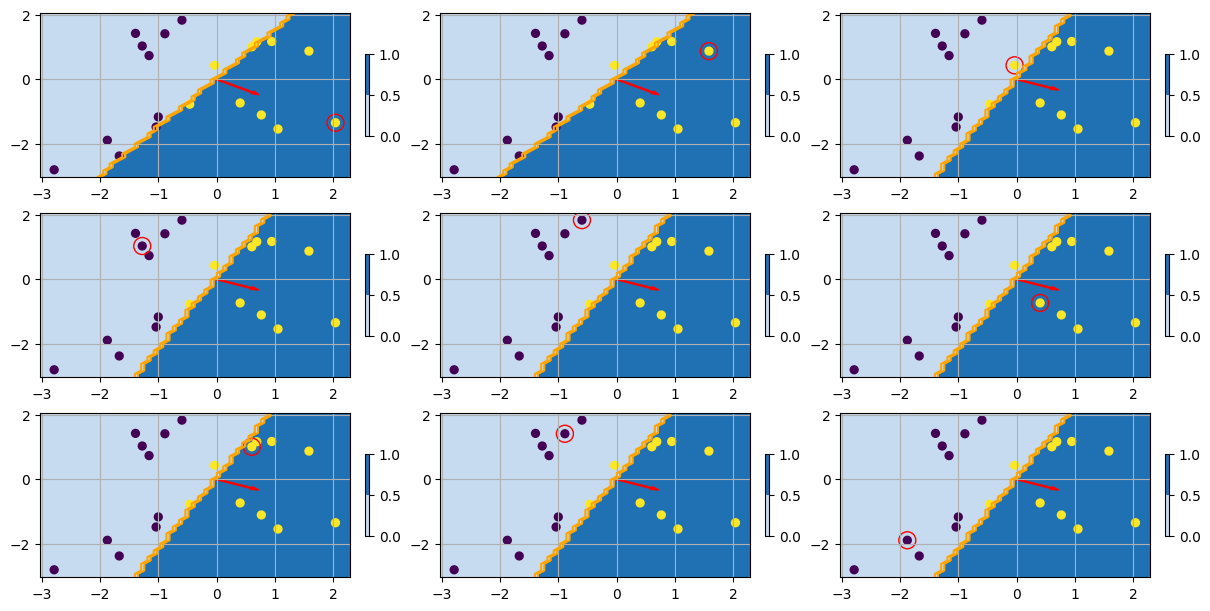

In [12]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))));
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: w[n + 1, :] @ x
    zz = np.heaviside(np.apply_along_axis(z, 1, XX), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, w[n+1, 0], w[n+1, 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)

<p style="page-break-after:always;"></p>

## 2.6 Estimación MAP

La regularización $\ell_2$ de regresión logística binaria consiste en asumir un prior Gaussiano para $\boldsymbol{w}$,
$$p(\boldsymbol{w})=\mathcal{N}(\boldsymbol{w}\mid\boldsymbol{0},\lambda^{-1}\mathbf{I})$$
y minimizar la log-verosimilitud negativa penalizada para hallar un estimador MAP de $\boldsymbol{w}$,
$$\begin{align*}
\boldsymbol{w}_{\text{map}}%
&=\operatorname*{argmax}_{\boldsymbol{w}}\;p(\boldsymbol{w}\mid\mathcal{D})\\%
&=\operatorname*{argmax}_{\boldsymbol{w}}\;\log p(\mathcal{D}\mid\boldsymbol{w})+\log p(\boldsymbol{w})\\%
&=\operatorname*{argmax}_{\boldsymbol{w}}\;\operatorname{LL}(\boldsymbol{w})-\lambda\boldsymbol{w}^t\boldsymbol{w}\\%
&=\operatorname*{argmin}_{\boldsymbol{w}}\;\operatorname{PNLL}(\boldsymbol{w})%
\qquad\text{con}\qquad%
\operatorname{PNLL}(\boldsymbol{w})=\operatorname{NLL}(\boldsymbol{w})+\lambda\boldsymbol{w}^t\boldsymbol{w}\\%
\end{align*}$$

<p style="page-break-after:always;"></p>

**Ejemplo:** datos sintéticos 2d y modelo polinómico

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Ntrain, Ntest, n_clusters_per_class, class_sep = 100, 1000, 2, 0.1 # Ntrain = 50 en PML1
N = Ntrain + Ntest
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=2, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep, random_state=1)
Xtrain = X[:Ntrain, :]; ytrain = y[:Ntrain]
Xtest = X[Ntrain:, :]; ytest = y[Ntrain:]
print(np.c_[Xtrain[:min(Ntrain, 10), :], ytrain[:min(Ntrain, 10)]])

[[-6.48928917e-01  1.96408596e-03  0.00000000e+00]
 [-2.69137092e-01 -6.04600245e-01  1.00000000e+00]
 [ 8.06035976e-01 -7.45521952e-01  0.00000000e+00]
 [-8.22767535e-01  1.71948873e-01  0.00000000e+00]
 [-4.75851630e-01  4.79774731e-01  0.00000000e+00]
 [ 9.17638363e-01  1.03699227e+00  1.00000000e+00]
 [ 4.80934984e-01  3.09073076e-01  1.00000000e+00]
 [ 7.12475381e-01  7.10609599e-01  1.00000000e+00]
 [-1.01316079e+00  8.37223758e-04  1.00000000e+00]
 [ 1.70220224e+00  7.64383740e-01  1.00000000e+00]]



<p style="page-break-after:always;"></p>


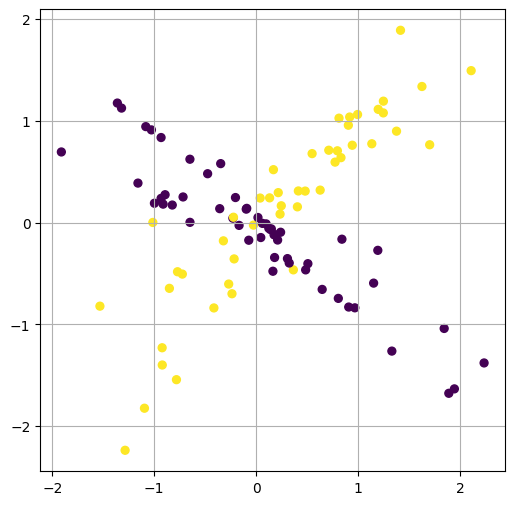

In [14]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*Xtrain.T, c=ytrain, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
XX = np.c_[np.ravel(xx), np.ravel(yy)]


<p style="page-break-after:always;"></p>


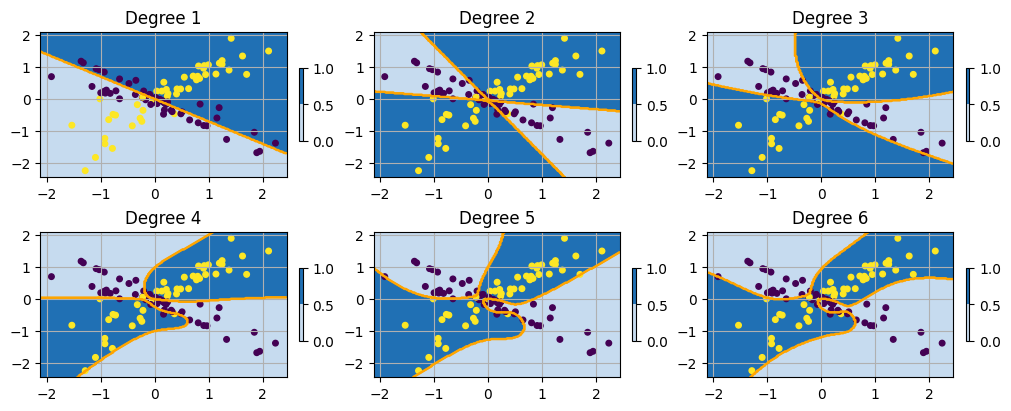

In [15]:
degrees = [1, 2, 3, 4, 5, 6]; nrows, ncols = 2, 3
acc_train = np.zeros(len(degrees)); acc_test = np.zeros(len(degrees))
C=1e4 # C = 1 / lambda: varianza del prior
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4), constrained_layout=True)
for i, degree in enumerate(degrees):
    ax = axes.flat[i]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, i + 1); ax.grid()
    transformer = PolynomialFeatures(degree)
    Xtrain_poly = transformer.fit_transform(Xtrain)[:, 1:] # skip the first column of 1s
    model = LogisticRegression(C=C, max_iter=1000).fit(Xtrain_poly, ytrain)
    acc_train[i] = accuracy_score(ytrain, model.predict(Xtrain_poly))
    Xtest_poly = transformer.fit_transform(Xtest)[:, 1:] # skip the first column of 1s
    acc_test[i] = accuracy_score(ytest, model.predict(Xtest_poly))
    XX_poly = transformer.fit_transform(XX)[:, 1:] # skip the first column of 1s
    z = lambda x: model.coef_[0] @ x; zz = np.heaviside(np.apply_along_axis(z, 1, XX_poly), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*Xtrain.T, c=ytrain, s=16)
    ax.set_title('Degree {}'.format(degree))


<p style="page-break-after:always;"></p>


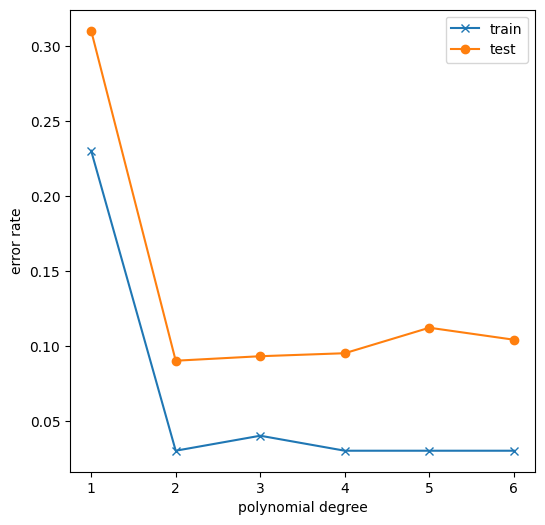

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(degrees, 1.0 - acc_train, 'x-', label='train')
plt.plot(degrees, 1.0 - acc_test, 'o-', label='test')
plt.legend()
plt.xlabel('polynomial degree')
plt.ylabel('error rate');


<p style="page-break-after:always;"></p>


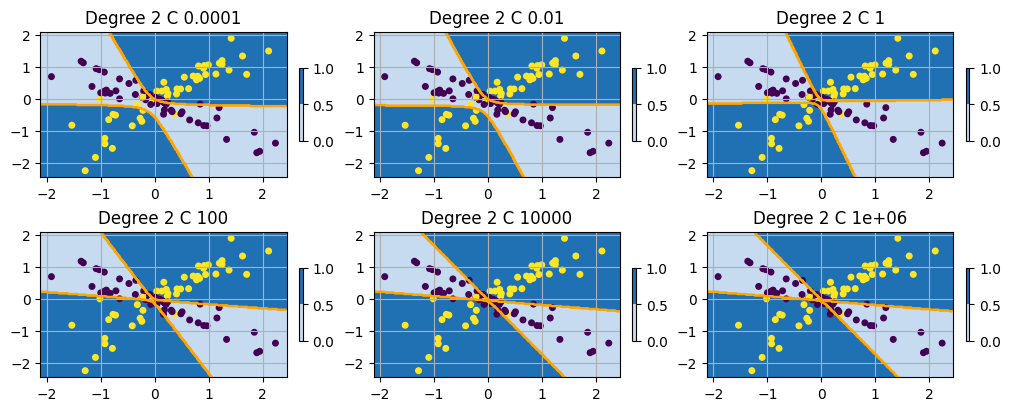

In [17]:
degree = 2; Cs = [1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6]; nrows, ncols = 2, 3
acc_train = np.zeros(len(Cs)); acc_test = np.zeros(len(Cs)) 
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4), constrained_layout=True)
for i, C in enumerate(Cs):
    ax = axes.flat[i]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, i + 1); ax.grid()
    transformer = PolynomialFeatures(degree)
    Xtrain_poly = transformer.fit_transform(Xtrain)[:, 1:] # skip the first column of 1s
    model = LogisticRegression(C=Cs[i], max_iter=1000).fit(Xtrain_poly, ytrain)
    acc_train[i] = accuracy_score(ytrain, model.predict(Xtrain_poly))
    Xtest_poly = transformer.fit_transform(Xtest)[:, 1:] # skip the first column of 1s
    acc_test[i] = accuracy_score(ytest, model.predict(Xtest_poly))
    XX_poly = transformer.fit_transform(XX)[:, 1:] # skip the first column of 1s
    z = lambda x: model.coef_[0] @ x; zz = np.heaviside(np.apply_along_axis(z, 1, XX_poly), 0.0)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 1, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*Xtrain.T, c=ytrain, s=16)
    ax.set_title('Degree {} C {:g}'.format(degree, Cs[i]))

<p style="page-break-after:always;"></p>

# 3 Regresión logística multiclase

## 3.1 Modelo

Regresión logística multinomial es una categórica condicional para clasificación multiclase, $y\in\{1,\dotsc,C\}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\operatorname{Cat}(y\mid S(\boldsymbol{a})),$$
de logits lineales con la entrada,
$$\boldsymbol{a}=f(\boldsymbol{x};\boldsymbol{\theta})=\mathbf{W}^t\boldsymbol{x}+\boldsymbol{b}%
\qquad\text{con}\qquad%
\boldsymbol{\theta}=(\mathbf{W}, \boldsymbol{b}), %
\quad\mathbf{W}\in\mathbb{R}^{D\times C}, %
\quad\boldsymbol{b}\in\mathbb{R}^D$$
En notación homogénea, anteponiendo un $1$ a $\boldsymbol{x}$ y $\boldsymbol{b}$ a $\mathbf{W}$,
$$\boldsymbol{a}=f(\boldsymbol{x};\boldsymbol{\theta})=\mathbf{W}^t\boldsymbol{x}$$


**Clasificación multiclase vs multi-etiqueta:**
* **Clasificación multiclase:** $\;$ caso estándar en el que solo una etiqueta es correcta
* **Clasificación multi-etiqueta:** $\;$ se admite que haya cero, una o más etiquetas correctas; suele modelizarse como una extensión de regresión logística binaria donde la salida es un vector de $C$ bits, $\boldsymbol{y}\in\{0,1\}^C$, para indicar la presencia o ausencia de cada etiqueta
$$p(\boldsymbol{y}\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\prod_{c=1}^C\operatorname{Ber}(y_c\mid\sigma(\boldsymbol{w}_c^t\boldsymbol{x})),$$

<p style="page-break-after:always;"></p>

## 3.2 Clasificadores lineales y no lineales

Al igual que regresión logística binaria, regresión logística multinomial halla fronteras lineales que, no obstante, pueden emplearse con datos no linealmente separables mediante linearización de los mismos en preproceso.

**Ejemplo:** $\;C=3$, $\;\boldsymbol{x}=(x_1,x_2)^t$, $\;\phi(\boldsymbol{x})=(1, x_1, x_2, x_1^2, x_2^2, x_1x_2)^t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as mcol

In [2]:
np.random.seed(234) # np.random.RandomState(0)
N, S = 100, 0.01 * np.eye(2)
Gs = [mvn(mean=[0.5, 0.5], cov=S), mvn(mean=[-0.5, -0.5], cov=S), mvn(mean=[0.5, -0.5], cov=S), 
      mvn(mean=[-0.5, 0.5], cov=S), mvn(mean=[0, 0], cov=S)]
X = np.concatenate([G.rvs(size=N) for G in Gs])
y = np.concatenate((1 * np.ones(N), 1 * np.ones(N), 2 * np.ones(N), 2 * np.ones(N), 3 * np.ones(N)))
print(np.c_[X[:min(N, 10), :], y[:min(N, 10)]])

[[0.58187916 0.39564494 1.        ]
 [0.53509007 0.59215783 1.        ]
 [0.49126181 0.18711154 1.        ]
 [0.40302673 0.59346658 1.        ]
 [0.50438663 0.64252155 1.        ]
 [0.44429373 0.59268244 1.        ]
 [0.37164463 0.60962569 1.        ]
 [0.30675275 0.54789592 1.        ]
 [0.63445896 0.48245793 1.        ]
 [0.49172956 0.41115453 1.        ]]



<p style="page-break-after:always;"></p>


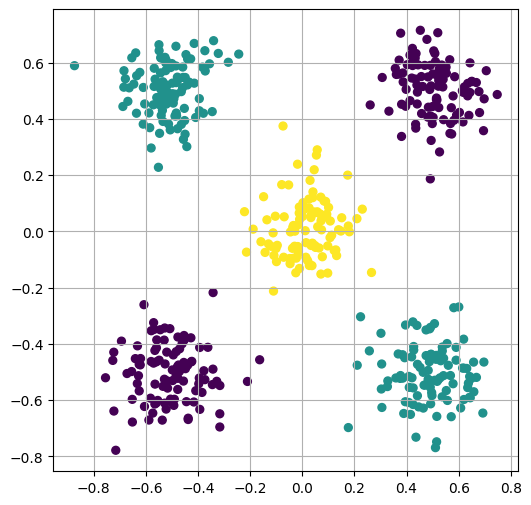

In [3]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
XX = np.c_[np.ravel(xx), np.ravel(yy)]


<p style="page-break-after:always;"></p>


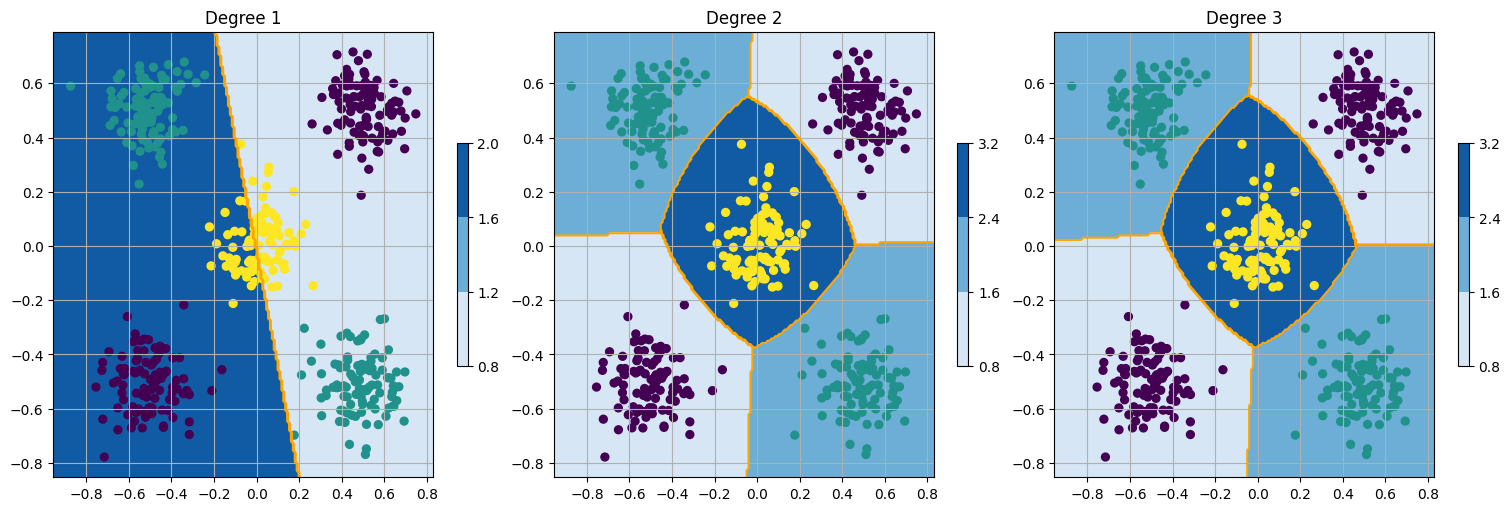

In [4]:
degrees = [1, 2, 3]; nrows, ncols = 1, 3
C=1e4 # C = 1 / lambda: varianza del prior
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5), constrained_layout=True)
for i, degree in enumerate(degrees):
    ax = axes.flat[i]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, i + 1); ax.grid()
    transformer = PolynomialFeatures(degree)
    X_poly = transformer.fit_transform(X)[:, 1:] # skip the first column of 1s
    model = LogisticRegression(C=C, max_iter=1000).fit(X_poly, y)
    XX_poly = transformer.fit_transform(XX)[:, 1:] # skip the first column of 1s
    zz = model.predict(XX_poly)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.scatter(*X.T, c=y, s=32)
    ax.set_title(f'Degree {degree}')

<p style="page-break-after:always;"></p>

## 3.3 Estimación máximo-verosímil

**Modelo:** $\;$ para $C$ clases, $y\in\{1,\dotsc,C\}$, con sesgo $\boldsymbol{b}$ absorbido por $\mathbf{W}\in\mathbb{R}^{D\times C}$
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})=\operatorname{Cat}(y\mid\boldsymbol{\mu})%
\qquad\text{con}\qquad%
\boldsymbol{\mu}=S(\boldsymbol{a})%
\quad\text{y}\quad%
\boldsymbol{a}=\mathbf{W}^t\boldsymbol{x}$$

**NLL:** $\;$ de $\mathbf{W}$ respecto a  $N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}\;$ (normalizada por $N$ y con etiquetas one-hot)
$$\begin{align*}
\operatorname{NLL}(\mathbf{W})%
&=-\frac{1}{N}\log p(\mathcal{D}\mid\mathbf{W})\\%
&=-\frac{1}{N}\log \prod_{n=1}^N \operatorname{Cat}(\boldsymbol{y}_n\mid \boldsymbol{\mu}_n)%
&&\text{($\boldsymbol{\mu}_n=S(\boldsymbol{a}_n)$ con logits $\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$)}\\%
&=-\frac{1}{N}\sum_{n=1}^N \log\prod_{c=1}^C \mu_{nc}^{y_{nc}}\\%
&=-\frac{1}{N}\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}\\%
&=\frac{1}{N}\sum_{n=1}^N \mathbb{H}(\boldsymbol{y}_n,\boldsymbol{\mu}_n)%
&&\text{($\mathbb{H}$ entropía cruzada)}%
\end{align*}$$

**Gradiente:** $\;$ en formato de $\mathbf{W}$
$$\mathbf{\nabla}_{\operatorname{vec}(\mathbf{W})}\operatorname{NLL}(\mathbf{W})=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$

**SGD:** $\;$ con minibatch de talla uno
$$\mathbf{W}_{t+1}=\mathbf{W}_t-\eta_t\,\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$

<p style="page-break-after:always;"></p>

**Ejemplo:** datos sintéticos 2d y modelo de sesgo nulo ($b=0$)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from scipy.special import logsumexp
N, n_clusters_per_class, class_sep = 30, 1, 1.0
X, y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_classes=3, 
    n_clusters_per_class=n_clusters_per_class, class_sep=class_sep, random_state=43)
print(np.c_[X[:min(N, 10), :], y[:min(N, 10)]])

[[ 2.1636225   0.32544657  2.        ]
 [-0.98598415  0.24480874  1.        ]
 [ 2.43571903  0.48704515  0.        ]
 [ 0.9342787   1.0535726   2.        ]
 [ 2.25037364  0.3984734   0.        ]
 [-1.39089919  0.97415801  1.        ]
 [ 0.3971162   1.5679538   2.        ]
 [ 0.6309278  -1.15749872  0.        ]
 [ 0.78697279  1.11748862  2.        ]
 [-1.58095132  1.8521708   1.        ]]



<p style="page-break-after:always;"></p>


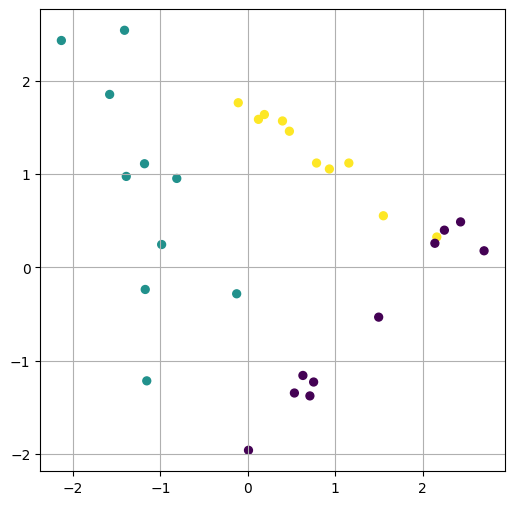

In [6]:
fig, ax = plt.subplots(figsize=(6, 6)); ax.grid(); ax.scatter(*X.T, c=y, s=32)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
XX = np.c_[np.ravel(xx), np.ravel(yy)]


<p style="page-break-after:always;"></p>


In [7]:
W, eta = np.zeros((N + 1, 3, 2)), 0.3
for n in np.arange(N):
    an = W[n, :, :] @ X[n, :]
    mun = np.exp(an - logsumexp(an))
    mun[y[n]] -= 1.0
    W[n+1, :, :] = W[n, :, :] - eta * np.outer(mun, X[n, :])
    if n < 3: print(n+1, W[n+1, :, :])

1 [[-0.21636225 -0.03254466]
 [-0.21636225 -0.03254466]
 [ 0.4327245   0.06508931]]
2 [[-0.09990987 -0.06145847]
 [-0.39570511  0.01198415]
 [ 0.49561498  0.04947432]]
3 [[ 5.09149935e-01  6.03288219e-02]
 [-4.57048808e-01 -2.82101608e-04]
 [-5.21011274e-02 -6.00467203e-02]]



<p style="page-break-after:always;"></p>


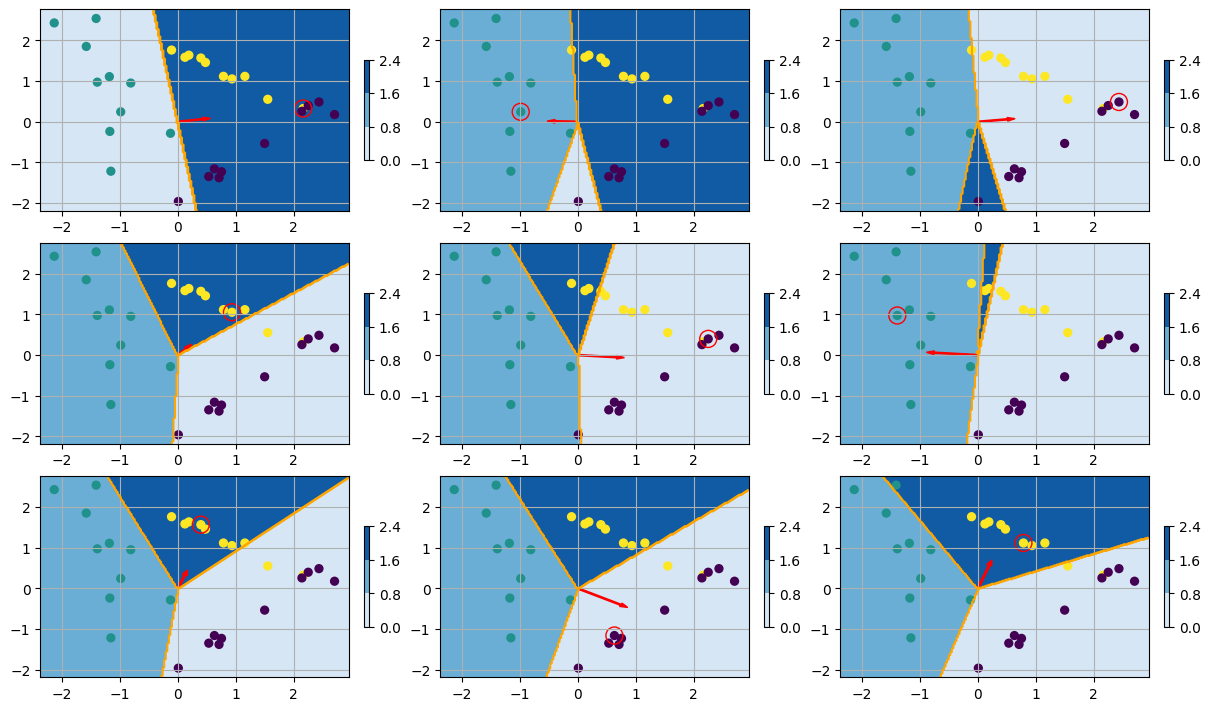

In [8]:
nrows = ncols = int(min(3, np.ceil(np.sqrt(N))))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 7), constrained_layout=True)
for n in np.arange(min(N, nrows * ncols)):
    ax = axes.flat[n]; ax.axis('off'); ax = fig.add_subplot(nrows, ncols, n + 1); ax.grid()
    z = lambda x: np.argmax(W[n+1, :, :] @ x); zz = np.apply_along_axis(z, 1, XX)
    ax.contour(xx, yy, zz.reshape(xx.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5)
    ax.arrow(0, 0, W[n+1, y[n], 0], W[n+1, y[n], 1], width=.03, facecolor='red', edgecolor='red')
    ax.scatter(*X.T, c=y, s=32); ax.scatter(X[n, 0], X[n, 1], facecolors='none', edgecolors='red', s=150)